In [6]:
from embedding_prediction_helpers import *

In [3]:
interaction_table = pd.read_csv('../../extracted_data/interaction_table_all.csv', sep=',', index_col=0)
interaction_table

,query_gene,array_gene,gi_score
0,YAL001C,YBL023C,-0.0348
1,YAL001C,YBL026W,-0.3529
2,YAL001C,YBL076C,-0.0250
3,YAL001C,YBL097W,-0.0808
4,YAL001C,YBR029C,-0.1173
...,...,...,...
1122249,YPR202W,YOR262W,-0.1490
1122250,YPR202W,YPL007C,-0.0572
1122251,YPR202W,YPL076W,0.0695
1122252,YPR202W,YPL169C,0.0567


In [4]:
embeddings = pd.read_csv('../../extracted_data/yeast_emb_full.csv', sep=',', index_col=0)
embeddings = embeddings.set_index('gene_id')
embeddings

,gc_5_prime,gc_3_prime,gc_cds,AAA,AAC,AAG,AAT,ACA,ACC,ACG,...,OG_NOG234093,OG_NOG234099,OG_NOG234101,OG_NOG234106,OG_NOG234162,OG_NOG234179,OG_NOG234180,OG_NOG234446,OG_NOG234447,OG_arCOG00968
gene_id,,,,,,,,,,,,,,,,,,,,,
YAL002W,0.365902,0.310000,0.372057,0.043956,0.019623,0.018053,0.039246,0.013344,0.007849,0.011774,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YAL003W,0.372881,0.253333,0.448220,0.009709,0.024272,0.077670,0.004854,0.000000,0.019417,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YAL004W,0.417747,0.346667,0.451163,0.023256,0.023256,0.000000,0.046512,0.004651,0.074419,0.013953,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YAL008W,0.381854,0.296667,0.388889,0.045455,0.020202,0.040404,0.050505,0.015152,0.005051,0.010101,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YAL009W,0.368893,0.323333,0.414414,0.042471,0.011583,0.023166,0.027027,0.011583,0.007722,0.007722,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR195C,0.334995,0.393333,0.467890,0.027523,0.000000,0.000000,0.027523,0.045872,0.009174,0.036697,...,0.000181,0.000181,0.000362,0.000181,0.000181,0.000362,0.000362,0.000181,0.000362,0.000181
YPR197C,0.376869,0.276667,0.374332,0.058824,0.021390,0.021390,0.016043,0.042781,0.005348,0.005348,...,0.000181,0.000181,0.000362,0.000181,0.000181,0.000362,0.000362,0.000181,0.000362,0.000181
YPR199C,0.329013,0.283333,0.391156,0.030612,0.020408,0.047619,0.047619,0.027211,0.003401,0.013605,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
available_genes = set(embeddings.index)
filtered = interaction_table[
    interaction_table['query_gene'].isin(available_genes) &
    interaction_table['array_gene'].isin(available_genes)
].copy()

filtered_sample = filtered.sample(n=10000, random_state=42) 

X = np.array([
    np.concatenate([embeddings.loc[row['query_gene']].values,
                    embeddings.loc[row['array_gene']].values])
    for _, row in filtered_sample.iterrows()
])


y = filtered_sample['gi_score'].values

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

## Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

0.8246917015577702


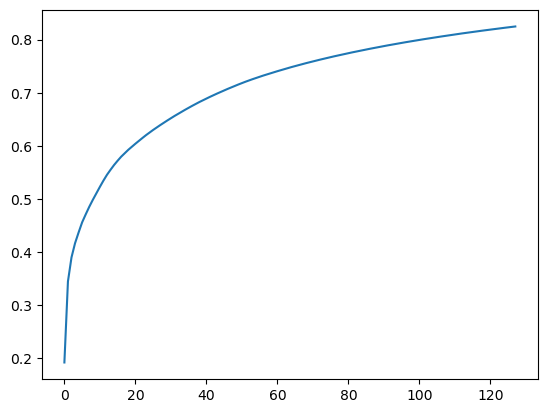

In [ ]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=128
pca = PCA(n_components=N)
X_PCA = pca.fit_transform(X.copy())
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

## Linear Regression with PCA

In [ ]:
random.seed(38)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R² score: -4.615
RMSE: 0.311


## XGBoost

XGBoost R² score: -0.048
XGBoost RMSE: 0.135


<Figure size 1000x600 with 0 Axes>

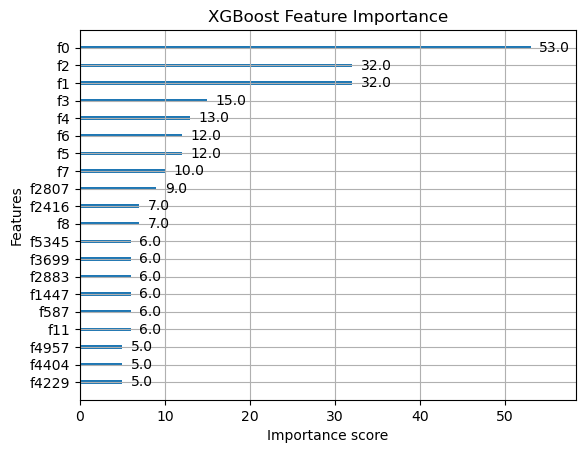

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"XGBoost R² score: {r2:.3f}")
print(f"XGBoost RMSE: {rmse:.3f}")

plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=20)
plt.title('XGBoost Feature Importance')
plt.show()

## RandomForests

Random Forest R² score: -0.001
Random Forest RMSE: 0.131


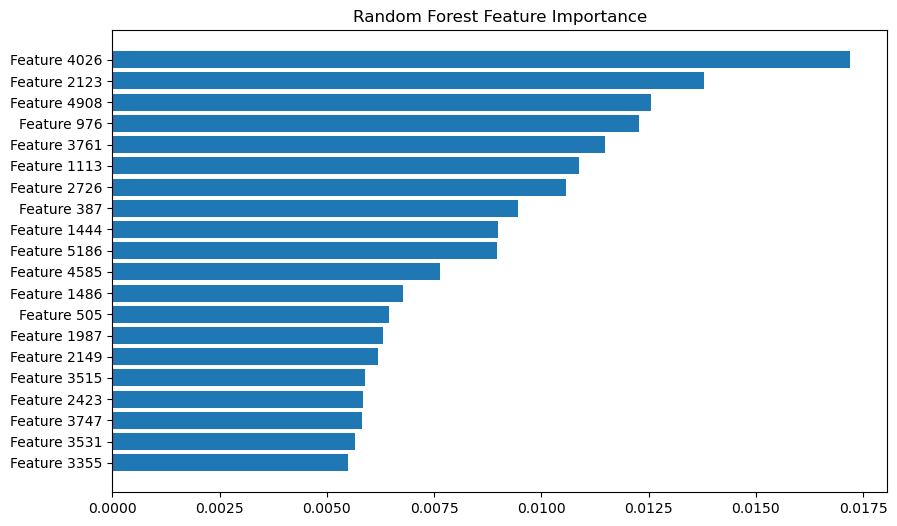

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Random Forest R² score: {r2:.3f}")
print(f"Random Forest RMSE: {rmse:.3f}")

# Add the column name
emb_cols = embeddings.columns.tolist()
n_emb_dims = len(emb_cols)
feature_names = [f"query_{col}" for col in emb_cols] + [f"array_{col}" for col in emb_cols]
#######################

plt.figure(figsize=(10, 6))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:] 

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()